In [2]:
import pandas as pd
import numpy as np

# Nutrition facts about different items for McDonald's menu.
df_mcd = pd.read_excel("/content/menu.xlsx")

# McDonald's store location information.
df_store = pd.read_excel("/content/outlets.xlsx")


In [ ]:
# Merge data using menu and outlets
data = pd.merge(left=df_store, 
                right=df_mcd, 
                how='left',
                left_on='Best_Selling_Item',
                right_on='Item'
                )

# Display the final data shape
print('Data Shape:', data.shape)

# Output top 3 rows
data.head(3)

Data Shape: (340, 31)


,Store_ID,Store_Name,Ownership_Type,Street_Address,City,State,Country,Postcode,Phone_Number,Timezone,...,Energy,Protein,Total_Fat,Saturated_Fat,Trans_Fat,Cholestrol,Carbohydrates,Sugars,Dietary_Fibre,Sodium
0,23149-228271,Banjara Hills,Joint Venture,"Lower Ground Floor, GVK One, Road Number 1, Ba...",Hyderabad,AP,IN,500034,NaN,GMT+05:30 Asia/New_Delhi,...,290,14,13.0,7.0,0.2,244,28,2,2,620
1,23191-228548,Kukatpally,Joint Venture,"Upper Ground Floor, Forum Sujana Mall, Kukatpally",Hyderabad,AP,IN,500072,NaN,GMT+05:30 Asia/New_Delhi,...,273,16,11.0,5.7,0.2,50,28,2,2,950
2,23193-228546,Madhapur,Joint Venture,"Lower Ground Floor, Inorbit Mall, Madhapur",Hyderabad,AP,IN,500081,NaN,GMT+05:30 Asia/New_Delhi,...,355,22,17.0,7.9,0.2,277,29,2,2,1020


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 340 entries, 0 to 339
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Store_ID             340 non-null    object 
 1   Store_Name           340 non-null    object 
 2   Ownership_Type       340 non-null    object 
 3   Street_Address       340 non-null    object 
 4   City                 340 non-null    object 
 5   State                340 non-null    object 
 6   Country              340 non-null    object 
 7   Postcode             340 non-null    int64  
 8   Phone_Number         248 non-null    object 
 9   Timezone             340 non-null    object 
 10  Longitude            340 non-null    float64
 11  Latitude             340 non-null    float64
 12  Revenue              340 non-null    float64
 13  Profits              340 non-null    float64
 14  Gross_Profit_Margin  340 non-null    float64
 15  Number_of_Employees  340 non-null    flo

In [ ]:
data[['Item','Best_Selling_Item']].head(20)

,Item,Best_Selling_Item
0,Egg & Cheese Muﬃn,Egg & Cheese Muﬃn
1,Sausage McMuﬀm,Sausage McMuﬀm
2,Sausage & Egg McMuﬀm,Sausage & Egg McMuﬀm
3,Veg McMuﬀm,Veg McMuﬀm
4,Veg Supreme Muﬃn,Veg Supreme Muﬃn
5,Hot Cakes with Maple Syrup,Hot Cakes with Maple Syrup
6,Hash Brown,Hash Brown
7,McEgg Burger,McEgg Burger
8,Chicken Maharaja Mac,Chicken Maharaja Mac
9,McChicken,McChicken


In [ ]:
data.drop(['Item'], axis = 1,inplace = True)

### Check the duplicate value

In [ ]:
data.duplicated().sum()

0

### Check the unique value bcz its mislead datatype

In [ ]:
data['Sodium'].unique()

array([620, 950, 1020, 1000, 960, 630, 370, 700, 1030, 840, 670, 570, 650,
       790, 940, 1830, 1330, 2030, 260, 520, 580, 320, 480, 720, 640,
       1290, 70, 210, 230, 220, 60, 80, 110, 170, 120, 240, '-', 0, 390,
       400, 410, 560, 450, 610, 440, 740, 420, 20, 920, 820, 750, 770,
       780, 860, 880, 1300, 1410, 1420, 1080, 1190, 1170, 1280, 1180,
       1470, 1250, 1320, 1480, 1510, 1560, 1680, 1590, 1700, 2150, 2260,
       2170, 2290, 590, 930, 160, 115, 1100, 1440, 680, 1040, 1110, 760,
       980, 990, 1400, 1230, 1720, 910, 1260, 1540, 1370, 1340, 1090, 360,
       540, 900, 1800, 3600, 300, 690, 150, 850, 730, 810, 130, 190, 290,
       65, 10, 90, 135, 85, 5, 35, 15, 45, 30, 100, 140, 50, 25, 125, 180,
       270, 280, 75, 40, 55, 250, 200, 380], dtype=object)

In [ ]:
data['Sodium'] = data['Sodium'].replace('-',np.NaN)   #'-' value replace with NaN value
data['Sodium'] = data['Sodium'].fillna(data['Sodium'].median())   #'-' value replace with median value

In [ ]:
#convert float number to int
data['Sodium'] = data['Sodium'].astype(int)

### Check Inconsistency of data Serve_Size feature 

In [ ]:
data['Serve_Size'].unique()

array([112, 157, 119, 139, '142 g', 64, 115, 246, '173 g', '136 g', 130,
       '169 g', 146, 199, 272, '186 g', 260, 110, 156, '220 g', 87, 96,
       144, 90, 180, 9, 25, 14, 10, 200, 275, 402, 277, 400, '249 g', 344,
       494, 249, '344 g', 300, '500 g', 250, 237, 247, 81, 93, '97 g',
       '92 g', '132 g', 92, 132, 111, 155, 147, 94, 167, '200 g', 141,
       133, 121, '123 g', 136, 135, 161, 185, 150, 164, 153, 117, 131,
       163, 177, 181, 143, 201, 174, 178, 205, 197, 241, '269 g', 283,
       '286 g', 420, 434, '423 g', 437, 151, 192, '111 g', 114, 251,
       '211 g', 202, 227, 235, 244, 98, 113, 270, '190 g', 159, 208, 213,
       230, 217, '284 g', 160, 171, 148, 316, 302, 310, 297, 314, 318,
       304, 291, 65, 97, 162, 323, 646, 142, 223, 255, 348, 335, '130 g',
       123, 116, 128, '121 g', 75, 168, '38 g', 34, 149, 77, '33 g', 33,
       29, 179, 182, 453, 595, 850, 340, '453 g', 236, 170, 623, 479,
       '595 g', 566, '566 g', '340 g', 907, '907 g', '623 g', 460

In [ ]:
data['Serve_Size'].value_counts()

453      38
340      33
623      16
566      12
200       8
         ..
200 g     1
94        1
155       1
132       1
403       1
Name: Serve_Size, Length: 166, dtype: int64

In [ ]:
data['Serve_Size'].values[45:55]

array([344, 494, '249 g', '344 g', 494, 300, '500 g', 200, 200, 250],
      dtype=object)

In [ ]:
# Replacing units of serve size with nothing
data['Serve_Size'] = data['Serve_Size'].astype(str).str.replace(' g', '').astype(int)

### Check Number_of_Employees & Customer feature it should not be float

In [ ]:
data['Number_of_Employees']

0       34.311197
1       25.487533
2       54.208502
3       45.046083
4       77.772607
          ...    
335     53.958251
336    105.235450
337     70.593890
338    146.414075
339     64.938810
Name: Number_of_Employees, Length: 340, dtype: float64

In [ ]:
data['Customers']

0       3979.583117
1       1156.010620
2      10346.720786
3       7414.746544
4      17887.234107
           ...     
335     4610.217597
336    20800.164800
337    23892.544328
338    10091.097751
339     9696.310312
Name: Customers, Length: 340, dtype: float64

In [ ]:
data['Number_of_Employees'] = data['Number_of_Employees'].apply(np.floor).astype(int)
data['Customers'] = data['Customers'].apply(np.floor).astype(int)

In [ ]:
data['Customers']

0       3979
1       1156
2      10346
3       7414
4      17887
       ...  
335     4610
336    20800
337    23892
338    10091
339     9696
Name: Customers, Length: 340, dtype: int32

In [ ]:
data.drop("Phone_Number",axis=1, inplace=True)

# EDA- Exploratory Data Analysis

### Outlets base Analysis

### Q1-How many stores are owned and run by McDonald??

In [ ]:
labels = data['Ownership_Type'].value_counts().index
values = data['Ownership_Type'].value_counts().values

<Axes: >

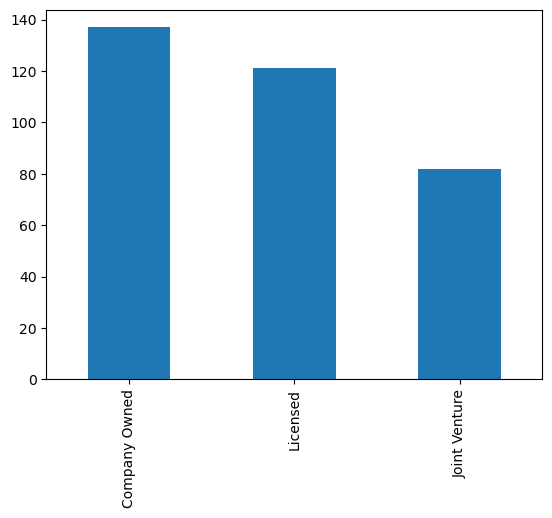

In [ ]:
#Bar Plot
data['Ownership_Type'].value_counts().plot(kind='bar')

<Axes: ylabel='Ownership_Type'>

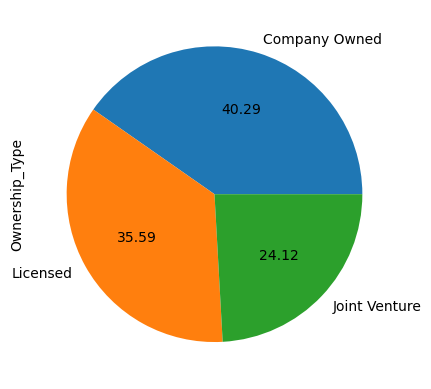

In [ ]:
#Pie Plot
data['Ownership_Type'].value_counts().plot(kind='pie',autopct='%.2f')

<Axes: ylabel='Ownership_Type'>

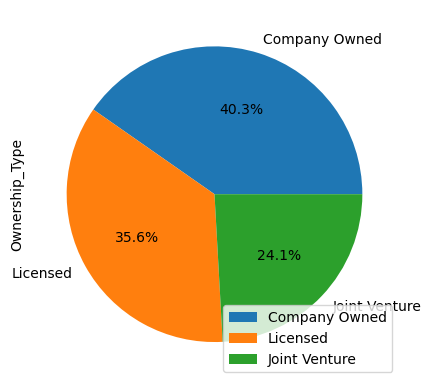

In [ ]:
#Donut Plot
data['Ownership_Type'].value_counts().plot(kind='pie',autopct='%1.1f%%',legend=True)

<Axes: xlabel='Ownership_Type', ylabel='count'>

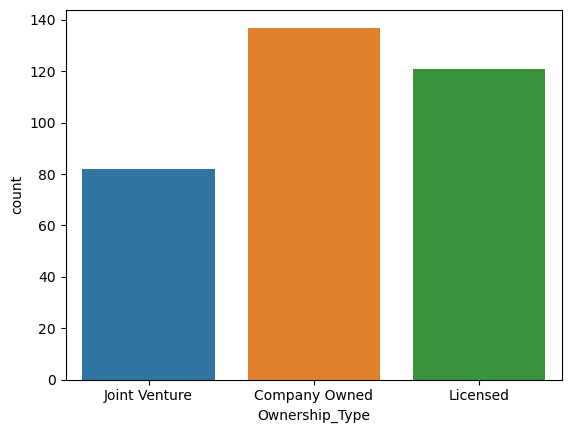

In [ ]:
#Count Plot
import seaborn as sns
sns.countplot(x=data['Ownership_Type']) 

### Q2: Which top 10 outlets generate maximum revenue for the company?

In [ ]:
top10outletsrevenue = data.iloc[data['Revenue'].sort_values(ascending=False)[:10].index,:]
top10outletsrevenue

,Store_ID,Store_Name,Ownership_Type,Street_Address,City,State,Country,Postcode,Timezone,Longitude,...,Energy,Protein,Total_Fat,Saturated_Fat,Trans_Fat,Cholestrol,Carbohydrates,Sugars,Dietary_Fibre,Sodium
139,10753-102015,19th & Telephone,Company Owned,620 SW 19th Street,Moore,OK,US,731605439,GMT-06:00 America/Chicago,-97.50,...,350,28,9.0,2.0,0.0,65,42,8,3,820
133,27316-246764,Fort Sill BX,Licensed,1718 Macomb Rd,Fort Sill,OK,US,73503,GMT-06:00 America/Chicago,-98.40,...,380,22,17.0,8.0,1.0,75,34,7,2,840
120,76740-99373,Target Cleveland South T-2228,Licensed,3465 Steelyard Dr,Cleveland,OH,US,441092385,GMT-05:00 America/New_York,-81.69,...,460,6,19.0,9.0,0.0,15,66,32,3,370
210,72668-65003,Super Target Tuscaloosa ST-1787,Licensed,1901 13th Ave E,Tuscaloosa,AL,US,354044785,GMT-06:00 America/Chicago,-87.51,...,100,8,2.5,1.5,0.0,10,12,12,0,125
103,15847-160724,Target Gateway T-1401,Licensed,519 Gateway Dr,Brooklyn,NY,US,112392801,GMT-05:00 America/New_York,-73.87,...,420,11,22.0,8.0,0.0,35,44,15,2,1030
338,20344-204610,Target Fountain Hills T-1432,Licensed,16825 E. Shea Boulevard,Fountain Hills,AZ,US,85268,GMT+000000 America/Phoenix,-111.72,...,810,21,32.0,15.0,1.0,60,114,103,2,400
258,9813-97844,JFK & McCain,Company Owned,4824 JFK,North LIttle Rock,AR,US,72116,GMT-06:00 America/Chicago,-92.25,...,340,10,11.0,7.0,0.0,35,49,42,2,150
302,13949-109207,SR 135 & Faith,Company Owned,311 S. State Rd 135,Greenwood,IN,US,461421423,GMT-05:00 America/Indianapolis,-86.16,...,370,14,6.0,3.5,0.0,25,65,59,1,250
291,9706-96992,Champaign - 5th & Green,Company Owned,503 E. Green Street,Champaign,IL,US,618205719,GMT-06:00 America/Chicago,-88.23,...,290,8,11.0,7.0,0.0,35,41,34,1,125
105,7381-1628,Elmwood Avenue,Company Owned,933 Elmwood Avenue,Buffalo,NY,US,142221211,GMT-05:00 America/New_York,-78.88,...,500,21,26.0,10.0,0.0,50,46,15,2,1320


In [ ]:
top10outletsrevenue[['Store_Name', 'Revenue']].set_index(['Store_Name'])

,Revenue
Store_Name,
19th & Telephone,49.680624
Fort Sill BX,49.415723
Target Cleveland South T-2228,49.044008
Super Target Tuscaloosa ST-1787,48.907285
Target Gateway T-1401,48.779107
Target Fountain Hills T-1432,48.744926
JFK & McCain,48.689383
SR 135 & Faith,48.569750
Champaign - 5th & Green,48.424482


<Axes: xlabel='Store_Name'>

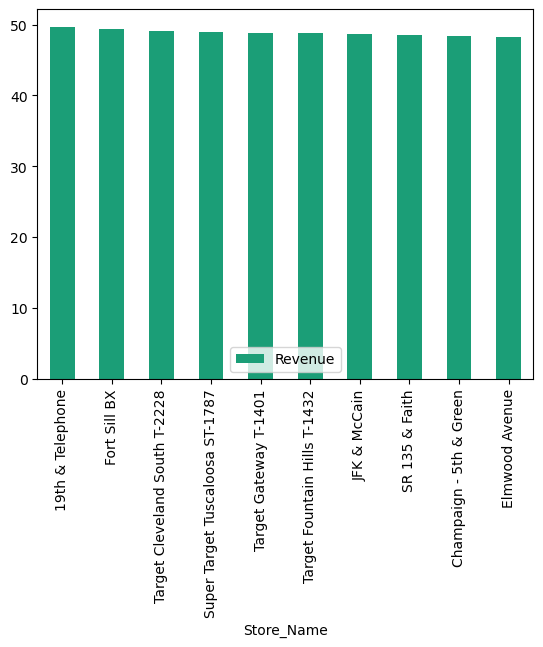

In [ ]:
top10outletsrevenue[['Store_Name', 'Revenue']].set_index(['Store_Name']).plot(kind = 'bar', color='#1B9E77')

### Q3: Top1 10 Outlets generate maximum profilt for the company??

In [ ]:
top10outletsprofits = data.iloc[data['Profits'].sort_values(ascending=False)[:10].index,:]

In [ ]:
top10outletsprofits[['Store_Name','Profits']].set_index(['Store_Name'])

,Profits
Store_Name,
Target Kansas City T-2222,13.514181
Super Target Tuscaloosa ST-1787,13.431480
U of AL - Ferguson Cntr,12.744686
2001 L St,12.733509
Champaign - 5th & Green,12.536321
Target Cleveland South T-2228,12.417562
Magazine & Washington,12.328887
State Rd 135 & Stonegate,12.325364
Kroger Southwest Store #572,12.144602


<Axes: xlabel='Store_Name'>

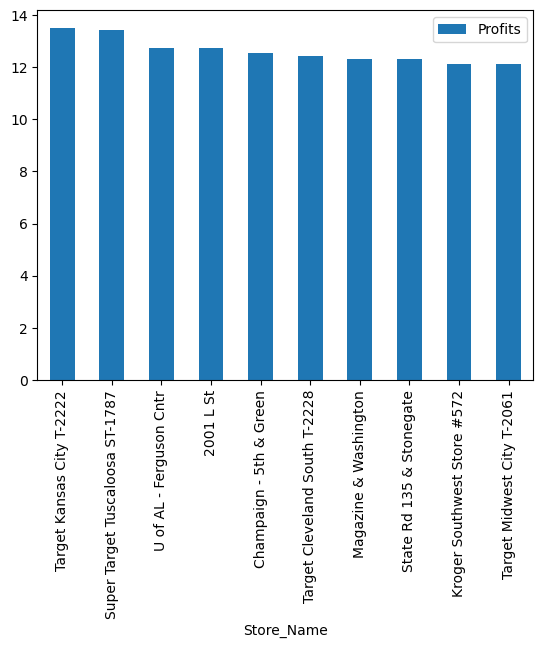

In [ ]:
top10outletsprofits[['Store_Name','Profits']].set_index(['Store_Name']).plot(kind='bar')

In [ ]:
data.columns

Index(['Store_ID', 'Store_Name', 'Ownership_Type', 'Street_Address', 'City',
       'State', 'Country', 'Postcode', 'Timezone', 'Longitude', 'Latitude',
       'Revenue', 'Profits', 'Gross_Profit_Margin', 'Number_of_Employees',
       'Customers', 'Best_Selling_Item', 'Category', 'Serve_Size', 'Energy',
       'Protein', 'Total_Fat', 'Saturated_Fat', 'Trans_Fat', 'Cholestrol',
       'Carbohydrates', 'Sugars', 'Dietary_Fibre', 'Sodium'],
      dtype='object')

#### Q3: Which top 10 outlets have highest numbers of employees???

In [ ]:
top10outletsemp = data.iloc[data['Number_of_Employees'].sort_values(ascending=False)[:10].index,:]

In [ ]:
top10outletsemp[['Number_of_Employees']]

,Number_of_Employees
139,149
133,148
120,147
258,146
338,146
210,146
103,146
291,145
105,145
167,145


<Axes: >

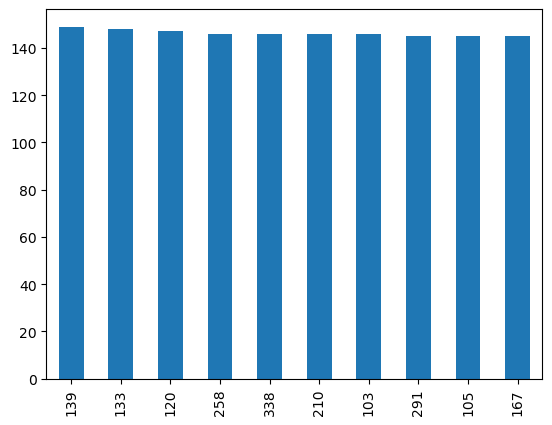

In [ ]:
top10outletsemp['Number_of_Employees'].plot(kind='bar')

#### Q:Which top 10 outlets have highest number of customers??

In [ ]:
data.columns

Index(['Store_ID', 'Store_Name', 'Ownership_Type', 'Street_Address', 'City',
       'State', 'Country', 'Postcode', 'Timezone', 'Longitude', 'Latitude',
       'Revenue', 'Profits', 'Gross_Profit_Margin', 'Number_of_Employees',
       'Customers', 'Best_Selling_Item', 'Category', 'Serve_Size', 'Energy',
       'Protein', 'Total_Fat', 'Saturated_Fat', 'Trans_Fat', 'Cholestrol',
       'Carbohydrates', 'Sugars', 'Dietary_Fibre', 'Sodium'],
      dtype='object')

In [ ]:
top10outletscust = data.iloc[data['Customers'].sort_values(ascending=False)[:10].index,:]

In [ ]:
top10outletscust['Customers']

281    24964
57     24780
51     24599
275    24465
38     24344
128    24250
327    24205
20     24162
255    24139
175    24101
Name: Customers, dtype: int32

<Axes: >

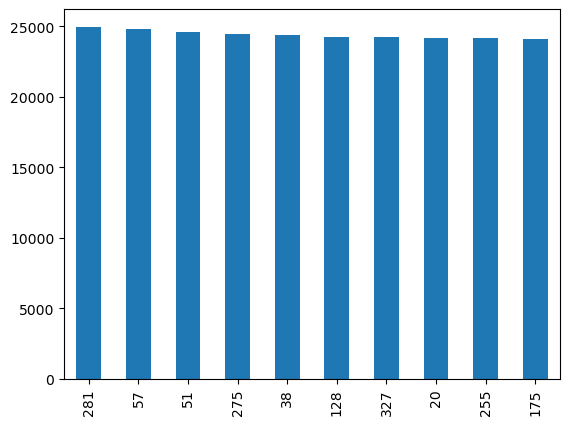

In [ ]:
top10outletscust['Customers'].plot(kind='bar')

### Nutritional value base Analysis

#### Q: Which is most common category in the menu??

In [ ]:
data['Category'].value_counts()

Hot Beverages           99
Breakfast               49
Cold Beverages          45
Smoothies & Shakes      34
Chicken & Fish          26
Desserts                24
Snacks & Sides          17
Beef & Pork             15
Sandwiches and Wraps    10
Salads                   6
Condiments               5
New Products             5
Nuggets                  3
Chicken Wings            2
Name: Category, dtype: int64

<Axes: >

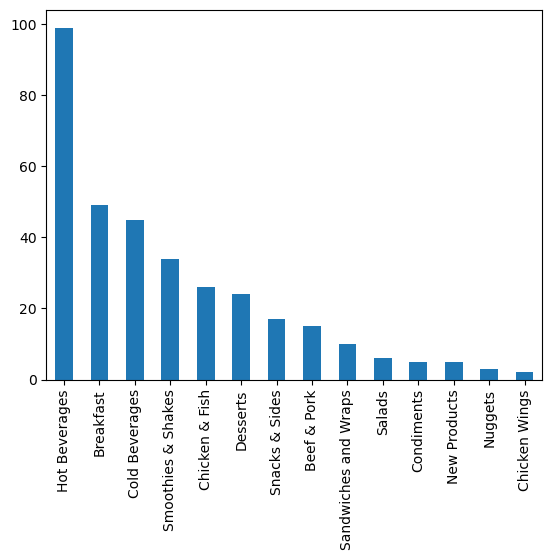

In [ ]:
data['Category'].value_counts().plot(kind='bar')

#### Q:on average how many calories are present in each category of the menu??

In [ ]:
data.columns

Index(['Store_ID', 'Store_Name', 'Ownership_Type', 'Street_Address', 'City',
       'State', 'Country', 'Postcode', 'Timezone', 'Longitude', 'Latitude',
       'Revenue', 'Profits', 'Gross_Profit_Margin', 'Number_of_Employees',
       'Customers', 'Best_Selling_Item', 'Category', 'Serve_Size', 'Energy',
       'Protein', 'Total_Fat', 'Saturated_Fat', 'Trans_Fat', 'Cholestrol',
       'Carbohydrates', 'Sugars', 'Dietary_Fibre', 'Sodium'],
      dtype='object')

In [ ]:
data.groupby(['Category'])['Energy'].mean().sort_values(ascending=False)

Category
Chicken & Fish          560.384615
Sandwiches and Wraps    505.700000
Breakfast               496.020408
Beef & Pork             494.000000
Smoothies & Shakes      481.088235
Chicken Wings           384.000000
New Products            334.400000
Snacks & Sides          290.352941
Nuggets                 280.666667
Hot Beverages           273.101010
Salads                  270.000000
Desserts                188.125000
Cold Beverages          123.711111
Condiments               39.200000
Name: Energy, dtype: float64